_Version Log: Changing the code for broadband images_

In [1]:
import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

source= "ir"  # "blue" "green" "red" "FBH800" "ir" "FBH1600" 
grating= 300 #mm^-1
order = -1
run= 6
file_type= ".csv"
distance_to_screen = 190 #mm
blaze_angle = 4 + 18/60 #degrees
alpha = 25 + 40/60 #degrees
beta = -10 - 10/60 #degrees
camera = "pyro" #"manta" "xeva" "purple" "pyro"

if camera == "manta":
    pixel_pitch = 9.9 #um
elif camera == "xeva":
    pixel_pitch = 20 #um
elif camera == "purple":
    pixel_pitch = 48.5 #um
elif camera == "pyro":
    pixel_pitch = 80 #um
else:
    raise ValueError(camera + " is not a valid camera.")

In [2]:
def find_files(source, grating, order, number, file_type):
    file_names = os.listdir("data\\")
    new_file_names=[]
    for file_name in file_names:
        check = re.findall('^'+source+'_'+str(grating)+"_n"+str(order)+"_"+str(number)+'_*.*'+file_type , file_name)
        if len(check) != 0:
            new_file_names = new_file_names + [file_name]
    return new_file_names

def find_delimiter(csv_file_name):
    with open('data\\'+csv_file_name, 'r') as file: #openai did this bit for me. It automatically detects which delimiter to use (pyro uses , xeva uses ;)
            first_line = file.readline()
            if ';' in first_line:
                delimiter = ';'
            else:
                delimiter = ','
    return delimiter

def import_data(source, grating, order, number, file_type):
    file_names = find_files(source= source, grating= grating, order= order, number= number, file_type= file_type)
    if file_type == ".csv":
        delimiter = find_delimiter(file_names[0])
        if len(file_names) == 1: # no background image
            data = np.genfromtxt("data\\"+file_names[0], delimiter= delimiter, dtype= np.float32, filling_values= np.nan)
        elif len(file_names) == 2:
            data = np.genfromtxt("data\\"+file_names[0], delimiter= delimiter, dtype= np.float32, filling_values= np.nan)
            bg = np.genfromtxt("data\\"+file_names[1], delimiter= delimiter, dtype= np.float32, filling_values= np.nan)
            data -= bg #backgound subtract
    return data

def diffaction(alpha, beta, n, g): #incident angle, diffacted angle, order, grove density
    alpha = np.deg2rad(np.array(alpha)) #convert to a np.array in radians
    beta = np.deg2rad(np.array(beta))
    n = np.array(n)
    g *= 1e3 #convert from mm^-1 to m^-1
    sine_sum = np.sin(alpha) + np.sin(beta).T #sine_sum doesn't hold much physical significance but it is a good intermediary.
    wavelength = sine_sum.T /n /g
    return wavelength

def import_normalised_csv(file_name, start_row):
    File = open('data\\'+file_name, 'rt')
    array = np.loadtxt(File, skiprows=start_row, delimiter = ",")
    File.close()
    array[:,1] = array[:,1] / np.max(array[:,1]) #normalise
    return array

def read_metadata(): #would be nice to filter by relivent data files.
    df = pd.read_excel("data\\metadata.xlsx")
    return df

In [3]:
read_metadata()

,light source,light source nickname,run number,date taken,grating density (mm^-1),blaze angle (degrees),camera,distance to camera (mm),order,absolute measured angle (degrees),absolute normal,other comments
0,green laser PL201,green,1,2023-10-25,1200,36.9°,NaN,270,"1,0,-1",included in file,NaN,measured using a screen and ruler
1,blue laser PL205,blue,1,2023-10-25,1200,36.9°,NaN,270,"1,0,-1",included in file,NaN,NaN
2,red laser PL202,red,1,2023-10-26,1200,36.9°,NaN,270,"1,0,-1",included in file,NaN,NaN
3,white source SLS201L,ir,2,2023-10-31,300,4.3°,Xeva 640,55,0,88°,64°,normal = 64
4,white source SLS201L,ir,2,2023-10-31,300,4.3°,Xeva 640,55,1,102°,64°,NaN
5,FBH1600 filter,FBH1600,2,2023-10-31,300,4.3°,Xeva 640,55,1,106°,64°,narrow slit
6,FBH1600 filter,FBH1600,2,2023-10-31,300,4.3°,Xeva 640,55,1,106°,64°,wide slit
7,FBH800 filter,FBH800,2,2023-10-31,300,4.3°,Xeva 640,55,1,97°,64°,NaN
8,white source SLS201L,ir,3,2023-11-01,300,4.3°,Xeva 640,55,0,88° 15',64° -10',NaN
9,white source SLS201L,ir,3,2023-11-01,300,4.3°,Xeva 640,55,1,102° 10',64° -10',NaN


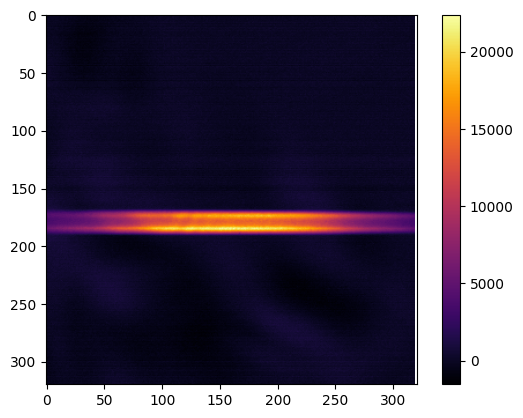

In [4]:
array = import_data(source= source, grating= grating, order= order, number= run, file_type= file_type)

im = plt.imshow(array, cmap= "inferno")
plt.colorbar(im)
plt.show()

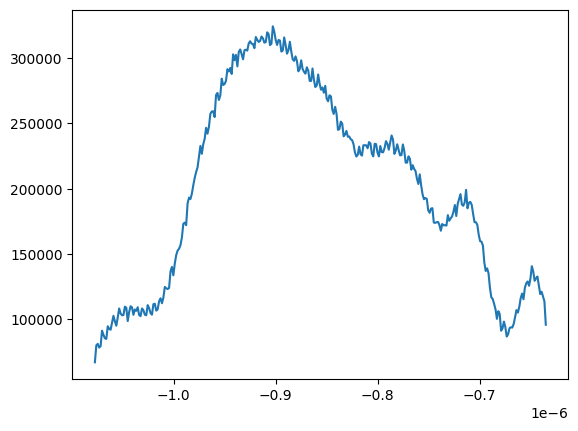

In [5]:
spectrum = np.sum(array, axis= 0)

central_wavelength = diffaction(alpha, beta, order, grating)
beta_half_range = np.arcsin(pixel_pitch*1e-3*len(spectrum)/2 /distance_to_screen) #assume that the central wavelength ray is normal to the center of the camera. (In laymans terms, the camera is facing the beam)
beta_half_range = np.rad2deg(beta_half_range)

betas = np.linspace(beta -beta_half_range, beta +beta_half_range, len(spectrum))
wavelengths = diffaction(alpha, betas, order, grating)

plt.plot(wavelengths, spectrum)
plt.show()


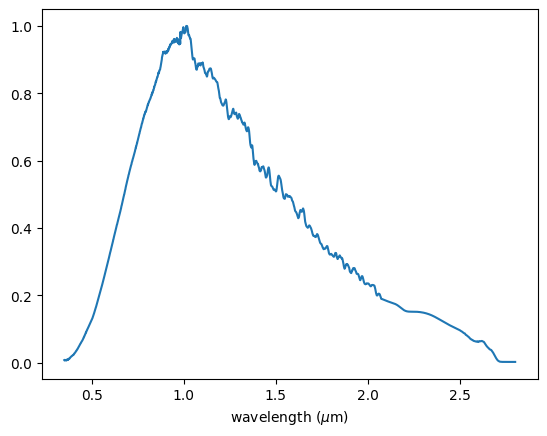

In [7]:
ir_data = import_normalised_csv("SLS201L_spectrum.csv", 1)

spectrum -= np.nanmin(spectrum)
spectrum /= np.nanmax(spectrum)

#plt.plot(wavelengths*1e6, spectrum*0.8)
plt.plot(ir_data[:,0]*1e-3, ir_data[:,1])

plt.xlabel("wavelength ($\mu$m)")
#plt.vlines(1.6, 0, 1, color= "k")

plt.show()